# Human Gait Recognition (PCA+LDA+KNN)

if you use colab, you can upload the dataset via the script below:

from google.colab import files

files.upload()

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
def read_gait(mat_id):
    Xy = scipy.io.loadmat(mat_id)
    return Xy['X'], Xy['y']


In [2]:
gait_dataset_dir = 'gait_dataset/'
train_normal = ['nm-01.mat','nm-02.mat', 'nm-03.mat','nm-04.mat']
test_normal = ['nm-05.mat','nm-06.mat']
test_bag = ['bg-01.mat','bg-02.mat']

In [3]:
def generating_traindata(gait_dataset_dir, train_normal):
    X_train01, y_train01 = read_gait(gait_dataset_dir+train_normal[0])
    X_train02, y_train02 = read_gait(gait_dataset_dir+train_normal[1])
    X_train03, y_train03 = read_gait(gait_dataset_dir+train_normal[2])
    X_train04, y_train04 = read_gait(gait_dataset_dir+train_normal[3])

    X_train = np.concatenate((X_train01, 
                              X_train02,
                              X_train03,
                              X_train04), axis=0)
    y_train = np.concatenate((y_train01.reshape(-1), 
                              y_train02.reshape(-1),
                              y_train03.reshape(-1),
                              y_train04.reshape(-1)), axis=0)
    return X_train, y_train

def choosing_testdata(gait_dataset_dir, test_set):
    X_test01, y_test01 = read_gait(gait_dataset_dir+test_set[0])
    X_test02, y_test02 = read_gait(gait_dataset_dir+test_set[1])

    X_test = np.concatenate((X_test01, 
                         X_test02), axis=0)
    y_test = np.concatenate((y_test01.reshape(-1), 
                         y_test02.reshape(-1)), axis=0)
    return X_test, y_test

In [4]:

def plot_gaits(images,h=128, w=88, n_row=4, n_col=12):
    
    plt.figure(figsize=(2 * n_col, 2.5 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(np.transpose(images[i].reshape((w, h))), cmap=plt.cm.gray)
        
        plt.xticks(())
        plt.yticks(())


printing gait energy images from the training set


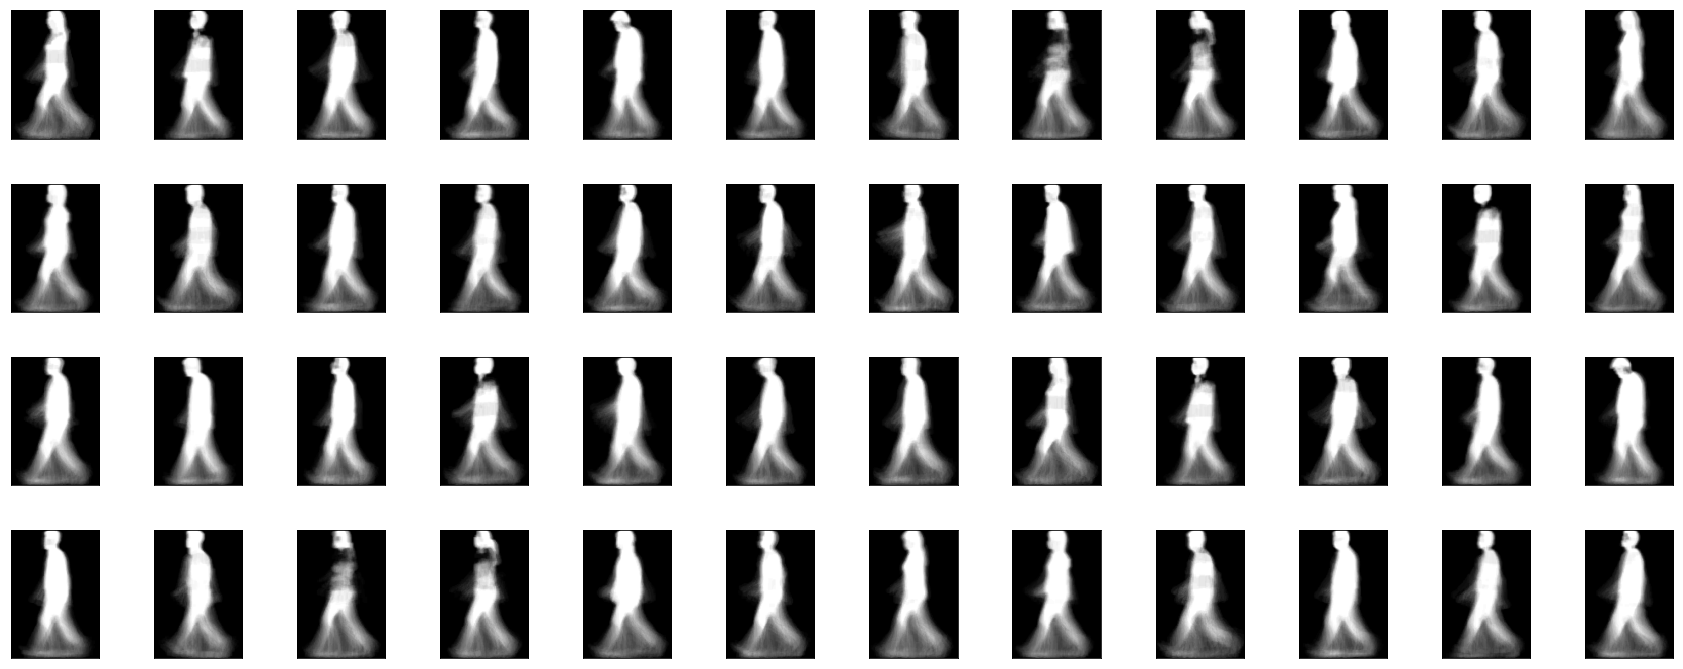

In [5]:
X_train, y_train = generating_traindata(gait_dataset_dir, train_normal)
print('printing gait energy images from the training set')
plot_gaits(X_train[::4,:])

printing gait energy images from the test set


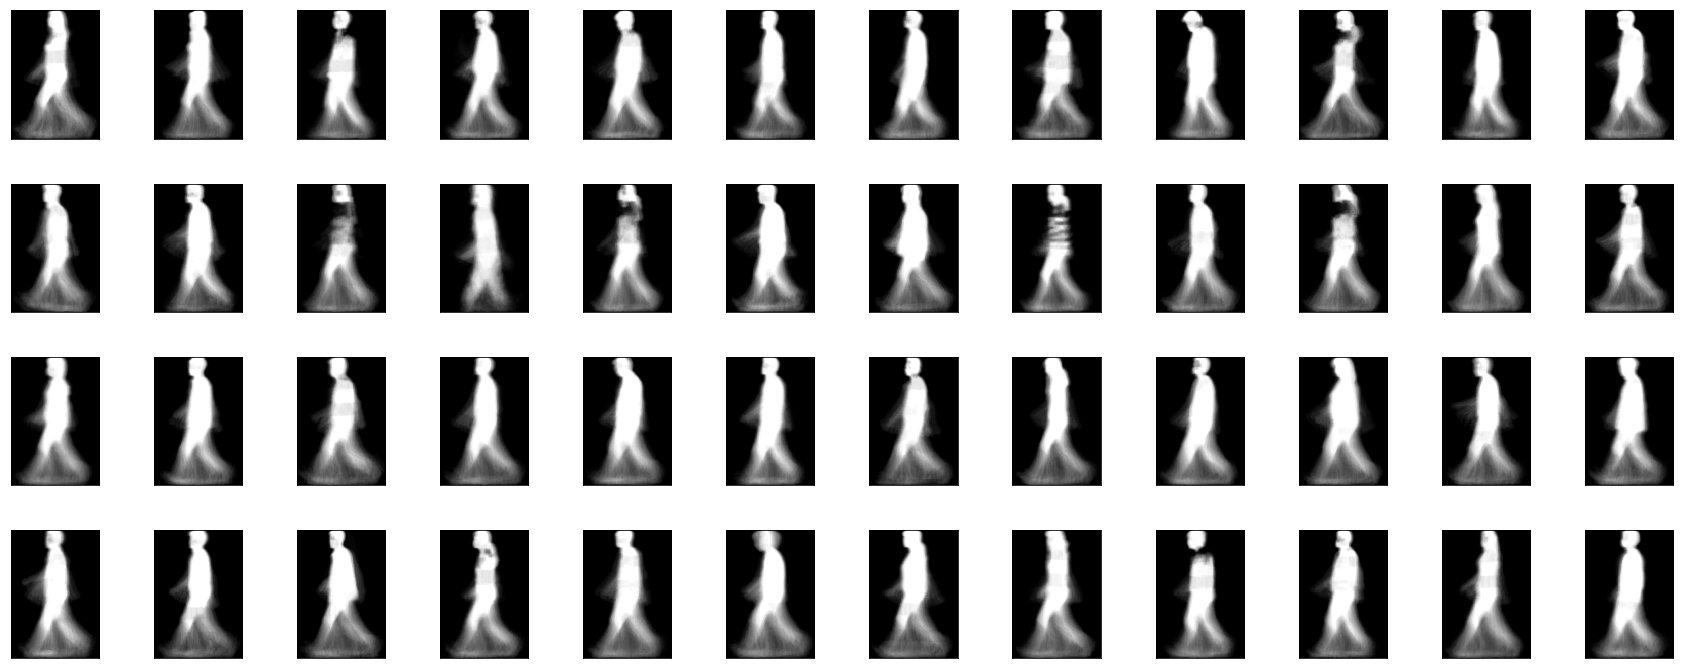

In [6]:
#test_data = test_bag
test_data = test_normal

X_test, y_test = choosing_testdata(gait_dataset_dir, test_data)
print('printing gait energy images from the test set')
plot_gaits(X_test[::2,:])

In [7]:
from sklearn.decomposition import PCA
def FE_eigengait(X_train0, X_test0, variance_ratio=0.95):
    pca = PCA(variance_ratio, whiten=True)
    X_train_pca = pca.fit_transform(X_train0)
    X_test_pca = pca.transform(X_test0)
    return X_train_pca, X_test_pca, pca

print('extracting eigengait features...')
X_train, X_test, pca = FE_eigengait(X_train, X_test)   

extracting eigengait features...


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def FE_fishergait(X_train0, y_train0, X_test0):
    lda = LinearDiscriminantAnalysis()
    X_train_lda = lda.fit_transform(X_train0,y_train)
    X_test_lda = lda.transform(X_test0)
    return X_train_lda, X_test_lda, lda
    
print('extracting fishergait features...')
X_train, X_test, lda = FE_fishergait(X_train, y_train, X_test)

extracting fishergait features...


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)




0.9959677419354839
